# 필수과제 :
 스스로 mpg데이터를 통해 질문을 하고 그 질문에 답을 찾는 코드를 작성하기, 주석처리 꼭 하기



In [152]:
import pandas as pd

In [153]:
file_url = "https://drive.google.com/file/d/1MxTrAJivTprYPkKMIdhIGcqAA6wr0BSC/view?usp=share_link" #구글드라이브 csv파일 이미지 주소
file_path='https://drive.google.com/uc?id=' + file_url.split('/')[-2] #'/'로 구분했을 때 url_path의 뒤에서 두번째 값이 공유된 파일의 고유값

print("공유파일 링크변환 경로명 : ", file_path)
mpg = pd.read_csv(file_path) #파일 불러오기

공유파일 링크변환 경로명 :  https://drive.google.com/uc?id=1MxTrAJivTprYPkKMIdhIGcqAA6wr0BSC


1. chevrolet의 malibu 모델의 평균 배기량을 조사하여라

In [154]:
mpg.query('manufacturer == "chevrolet" & model == "malibu"')['displ'].mean()

# query문을 이용해서 제조사가 chevrolet이고 모델이 malibu인 행을 추출
# 배기량(displ) 열을 추출
# mean method를 이용하여 평균 배기량을 구함

3.0

2. audi, hyundai, toyota, volkswagen인 차들의 평균 도시연비와 평균 고속도로 연비를 구하시오.

In [155]:
# 방법1
mpg.query('manufacturer in ["audi", "hyundai", "toyota", "volkswagen"]').groupby('manufacturer').mean()[['hwy', 'cty']]

# query문을 이용해서 제조사가 audi, hyundai, toyota, volkswagen인 열을 추출
# 제조사별로 groupby를 진행
# mean method를 이용하여 모든 열의 평균을 구함
# 구해진 평균들 중 고속도로연비와 도시연비만 선택해서 추출  

,hwy,cty
manufacturer,,
audi,26.444444,17.611111
hyundai,26.857143,18.642857
toyota,24.911765,18.529412
volkswagen,29.222222,20.925926


In [156]:
# 방법2
mpg.query('manufacturer in ["audi", "hyundai", "toyota", "volkswagen"]').groupby('manufacturer').agg(mean_hwy = ('hwy', 'mean'),
                                                                                                     mean_cty = ('cty', 'mean'))

# query문을 이용해서 제조사가 audi, hyundai, toyota, volkswagen인 열을 추출
# 제조사별로 groupby를 진행
# agg method를 이용하여 고속도로 연비와 도시연비에 대해 평균을 구함

,mean_hwy,mean_cty
manufacturer,,
audi,26.444444,17.611111
hyundai,26.857143,18.642857
toyota,24.911765,18.529412
volkswagen,29.222222,20.925926


In [157]:
# 방법3
mpg.groupby('manufacturer').agg(mean_hwy = ('hwy', 'mean'), mean_cty = ('cty', 'mean')).query('manufacturer in ["audi", "hyundai", "toyota", "volkswagen"]')

# 앞의 방법2와 순서만 다르게 진행
# 제조사별로 groupby를 진행
# agg method를 이용하여 고속도로 연비와 도시연비에 대해 평균을 구함
# query문을 이용해서 제조사가 audi, hyundai, toyota, volkswagen인 열을 추출

,mean_hwy,mean_cty
manufacturer,,
audi,26.444444,17.611111
hyundai,26.857143,18.642857
toyota,24.911765,18.529412
volkswagen,29.222222,20.925926


3. 복합연비(cby)를 구하는 식은 0.55*cty + 0.45*hwy임을 이용하여 새로운 변수 복합연비를 만들고 제조사/모델별 평균이 전체 복합연비의 평균보다 높으면 test라는 변수에 good을 할당하고 낮으면 bad를 할당하라

In [158]:
import numpy as np

In [159]:
mpg.assign(cby = lambda x : 0.55 * x['cty'] + 0.45 * x['hwy']).groupby(['manufacturer', 'model']).mean().assign(test = lambda x : np.where(x['cby'] > x['cby'].mean(), 'good', 'bad'))

# assign method를 이용해서 복합연비(cby) 변수를 생성
# 제조사와 모델별로 groupby를 진행
# 모든 변수(열)에 대해 평균을 구함
# assign method 와 where 문을 이용해서 복합연비가 그 평균보다 크면 good, 작으면 bad를 test라는 변수에 할당하여 새로운 변수 test생성

displ         year       cyl  \
manufacturer model                                                     
audi         a4                      2.328571  2002.857143  4.857143   
             a4 quattro              2.425000  2003.500000  5.000000   
             a6 quattro              3.366667  2005.000000  6.666667   
chevrolet    c1500 suburban 2wd      5.520000  2006.200000  8.000000   
             corvette                6.160000  2004.400000  8.000000   
             k1500 tahoe 4wd         5.700000  2003.500000  8.000000   
             malibu                  3.000000  2004.400000  5.200000   
dodge        caravan 2wd             3.390909  2003.090909  5.818182   
             dakota pickup 4wd       4.411111  2004.000000  7.111111   
             durango 4wd             4.971429  2004.142857  7.714286   
             ram 1500 pickup 4wd     5.020000  2005.300000  8.000000   
ford         expedition 2wd          5.133333  2002.000000  8.000000   
             explorer 4wd            4.266667  2002.000000  6.666667   
             f150 pickup 4wd         4.714286  2001.571429  7.428571   
             mustang                 4.377778  2004.000000  7.111111   
honda        civic                   1.711111  2003.000000  4.000000   
hyundai      sonata                  2.557143  2002.857143  4.857143   
             tiburon                 2.300000  2005.428571  4.857143   
jeep         grand cherokee 4wd      4.575000  2005.750000  7.250000   
land rover   range rover             4.300000  2003.500000  8.000000   
lincoln      navigator 2wd           5.400000  2002.000000  8.000000   
mercury      mountaineer 4wd         4.400000  2003.500000  7.000000   
nissan       altima                  2.800000  2005.000000  4.666667   
             maxima                  3.166667  2002.000000  6.000000   
             pathfinder 4wd          4.050000  2003.500000  6.500000   
pontiac      grand prix              3.960000  2002.600000  6.400000   
subaru       forester awd            2.500000  2005.000000  4.000000   
             impreza awd             2.425000  2003.500000  4.000000   
toyota       4runner 4wd             3.483333  2002.000000  5.666667   
             camry                   2.671429  2002.857143  4.857143   
             camry solara            2.642857  2002.857143  4.857143   
             corolla                 1.800000  2002.600000  4.000000   
             land cruiser wagon 4wd  5.200000  2003.500000  8.000000   
             toyota tacoma 4wd       3.271429  2002.857143  5.142857   
volkswagen   gti                     2.160000  2002.600000  4.400000   
             jetta                   2.277778  2003.000000  4.666667   
             new beetle              2.133333  2002.000000  4.333333   
             passat                  2.400000  2002.857143  4.857143   

                                           cty        hwy        cby  test  
manufacturer model                                                          
audi         a4                      18.857143  28.285714  23.100000  good  
             a4 quattro              17.125000  25.750000  21.006250  good  
             a6 quattro              16.000000  24.000000  19.600000  good  
chevrolet    c1500 suburban 2wd      12.800000  17.800000  15.050000   bad  
             corvette                15.400000  24.800000  19.630000  good  
             k1500 tahoe 4wd         12.500000  16.250000  14.187500   bad  
             malibu                  18.800000  27.600000  22.760000  good  
dodge        caravan 2wd             15.818182  22.363636  18.763636   bad  
             dakota pickup 4wd       12.777778  17.000000  14.677778   bad  
             durango 4wd             11.857143  16.000000  13.721429   bad  
             ram 1500 pickup 4wd     11.400000  15.300000  13.155000   bad  
ford         expedition 2wd          11.333333  17.333333  14.033333   bad  
             explorer 4wd            13.666667  18.000000  15.616667   bad  
    

4. 2008년에 만들어진 자동차에서 복합연비가 좋은 4개를 추출하면?

In [160]:
mpg.assign(cby = lambda x : 0.55 * x['cty'] + 0.45 * x['hwy']).query('year == 2008').sort_values(by = 'cby', ascending = False).head(4)

# assign method를 이용해서 새로운 변수 복합연비(cby)를 생성
# query문을 이용해서 2008년에 생산된 차량을 추출
# 복합연비를 기준으로 내림차순으로 정렬
# 가장 좋은 4개를 출력하기 위해 head(4)를 이용

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,cby
196,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,32.05
197,toyota,corolla,1.8,2008,4,auto(l4),f,26,35,r,compact,30.05
105,honda,civic,1.8,2008,4,auto(l5),f,25,36,r,subcompact,29.95
104,honda,civic,1.8,2008,4,manual(m5),f,26,34,r,subcompact,29.60


5. toyota 회사의 category별로 차량 대수를 구하시오.



In [161]:
mpg[mpg['manufacturer']=='toyota']["category"].value_counts().to_frame(name = "toyota 회사 차량 대수")

# 제조사가 toyota인 차량들만 추출
# category 열만 추출
# value_counts()를 이용하여 category의 unique한 값들의 개수를 구함
# 마지막에 열이름이 toyota 회사 차량 대수인 데이터프레임으로 변환

,toyota 회사 차량 대수
compact,12
suv,8
midsize,7
pickup,7


6. 변속기 종류(trans)별로 차량 대수를 나타내는 barplot을 그리자.

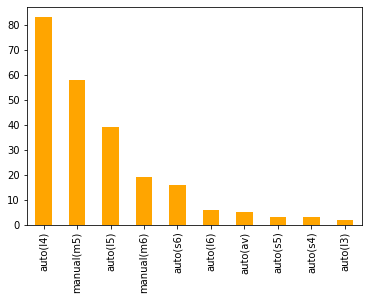

In [162]:
mpg['trans'].value_counts().plot.bar(color = 'orange')

# mpg 데이터에서 trans 열만 추출
# trans 열에서 unique한 값들의 개수를 구함
# 이를 plot에 나타내기 위해 .plot.bar를 이용하고 bar color를 orange로 지정

7. mpg 데이터에서 chevrolet, ford, honda, toyota, nissan 배기량 도시연비, 고속도로연비를 구하는 데이터프레임을 제조사별로 만들어서 병합하자.

In [163]:
chevrolet = mpg.query('manufacturer == "chevrolet"')[['displ', 'cty', 'hwy']].mean().to_frame(name = "chevrolet")
ford = mpg.query('manufacturer == "ford"')[['displ', 'cty', 'hwy']].mean().to_frame(name = "ford")
honda = mpg.query('manufacturer == "honda"')[['displ', 'cty', 'hwy']].mean().to_frame(name = "honda")
toyota = mpg.query('manufacturer == "toyota"')[['displ', 'cty', 'hwy']].mean().to_frame(name = "toyota")
nissan = mpg.query('manufacturer == "nissan"')[['displ', 'cty', 'hwy']].mean().to_frame(name = "nissan")

display(chevrolet)
display(ford)
display(honda)
display(toyota)
display(nissan)

# 각 제조사별로 원하는 제조사만 추출
# 배기량, 도시연비, 고속도로연비에 해당하는 열만 추출
# 추출된 열에 대해 평균을 구하고 데이터 프레임으로 변환한 후 각 제조사 이름을 가진 변수에 저장
# 마지막에 결과값을 한번에 보여주기 위해 display 를 이용

mpg_mean = pd.concat([chevrolet, ford, honda, toyota, nissan], axis = 1)
display(mpg_mean)

# 각 제조사별로 구해진 평균을 concat을 이용하여 열을 기준으로 병합
# 마찬가지로 마지막에 결과값을 한번에 보여주기 위해 display 를 이용

,chevrolet
displ,5.063158
cty,15.000000
hwy,21.894737


,ford
displ,4.536
cty,14.000
hwy,19.360


,honda
displ,1.711111
cty,24.444444
hwy,32.555556


,toyota
displ,2.952941
cty,18.529412
hwy,24.911765


,nissan
displ,3.269231
cty,18.076923
hwy,24.615385


,chevrolet,ford,honda,toyota,nissan
displ,5.063158,4.536,1.711111,2.952941,3.269231
cty,15.000000,14.000,24.444444,18.529412,18.076923
hwy,21.894737,19.360,32.555556,24.911765,24.615385


8. 회사별로 복합연비의 최댓값과 최솟값의 차이가 가장 큰 회사부터 정렬하시오.

In [164]:
mpg_cty_diff = mpg.assign(cby = lambda x : 0.55 * x['cty'] + 0.45 * x['hwy']).groupby('manufacturer').max()['cby'] - mpg.assign(cby = lambda x : 0.55 * x['cty'] + 0.45 * x['hwy']).groupby('manufacturer').min()['cby'] 
mpg_cty_diff.to_frame(name = 'diff_cty_max_min').sort_values('diff_cty_max_min', ascending = False)

# assign method를 이용해서 복합연비(cby)라는 새로운 변수를 생성
# 제조사별로 groupby를 진행
# 최댓값과 최솟값을 구하기 위해 max/min method를 이용
# 최댓값과 최솟값의 차이를 mpg__cty_diff라는 변수에 저장
# 이를 데이터프레임으로 변환 후 내림차순으로 정렬

,diff_cty_max_min
manufacturer,
volkswagen,19.90
toyota,19.25
chevrolet,13.25
nissan,12.35
dodge,10.35
jeep,8.90
ford,8.80
audi,6.00
hyundai,5.90


9. 구동방식 별로 그룹화해서 도시연비가 가장 높은 순으로 데이터프레임을 생성하시오.



In [165]:
mpg.groupby('drv').mean()['cty'].to_frame('mean_cty').sort_values('mean_cty', ascending = False)

# 구동방식 별로 groupby를 진행
# 모든 변수(열)에 대해 평균을 구한 후 도시연비만 추출
# series 형태를 mean_cty열 이름을 가진 데이터프레임으로 변환 후
# 내림차순으로 정렬

,mean_cty
drv,
f,19.971698
4,14.330097
r,14.080000


10. honda, nissan, toyota인 차를 제외하고 그룹별로 도시연비, 고속도로 연비 중앙값을 구해서 이를 plot에 나타내시오.



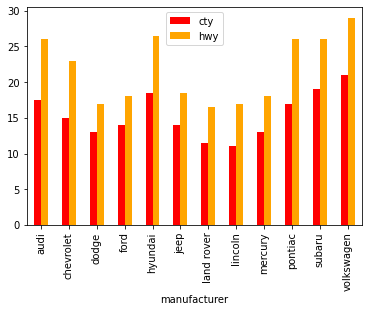

In [166]:
mpg.query('manufacturer != ["honda", "nissan", "toyota"]').groupby('manufacturer').median()[['cty', 'hwy']].plot.bar(color = ['r', 'orange'])

# 제조사가 honda, nissan, toyota를 제외하고 추출
# 제조사별로 groupby를 진행
# 모든 변수(열)에 대해 중앙값을 구하고 도시연비, 고속도로연비 열만 추출
# 제조사별 도시연비와 고속도로연비에 대해 barcolor가 빨간색, 오렌지인 barplot을 그림

11. 실린더 개수별 배기량, 도시연비, 고속도로연비, 복합연비의 평균을 구하고, 복합연비를 기준으로 내림차순 정렬하시오. 또한 실린더 개수와 다른 변수들의 상관관계를 파악하기 위한 plot을 그려보아라.

In [167]:
mpg.assign(cby = lambda x : 0.55 * x['cty'] + 0.45 * x['hwy']).groupby('cyl').mean().drop(columns = 'year').sort_values('cby', ascending = False)

# assign method를 이용해서 복합연비라는 새로운 변수를 생성
# 실린더개수에 대해 groupby를 진행하여 모든 numeric 변수에 대해 평균을 구함
# 이 중 필요없는 변수인 year를 삭제
# 복합연비를 기준으로 내림차순으로 정렬

,displ,cty,hwy,cby
cyl,,,,
4,2.145679,21.012346,28.802469,24.517901
5,2.500000,20.500000,28.750000,24.212500
6,3.408861,16.215190,22.822785,19.188608
8,5.132857,12.571429,17.628571,14.847143


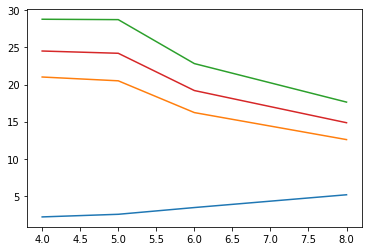

In [168]:
mpg_cyl = mpg.assign(cby = lambda x : 0.55 * x['cty'] + 0.45 * x['hwy']).groupby('cyl').mean().drop(columns = 'year').sort_values('cby', ascending = False)

import matplotlib.pyplot as plt

plt.plot(mpg_cyl['displ'])
plt.plot(mpg_cyl['cty'])
plt.plot(mpg_cyl['hwy'])
plt.plot(mpg_cyl['cby'])

# 위에서 구한 데이터프레임을 mpg_cyl에 저장
# matplotlib를 이용
# 각 변수와 cyl와의 상관관계를 파악하기 위해 선 그래프를 그림
# 실제로 배기량과는 양의 상관관계 나머지 세개의 변수와는 음의 상관관계를 띄는 것으로 보임

12. mpg 데이터에서 가장 많이 사용되는 연료를 구하시오.

In [169]:
mpg.groupby('fl').count().sort_values('model', ascending = False)

# 연료를 기준으로 groupby를 진행
# 해당연료를 사용하는 차량의 대수를 구하기 위해 count를 이용
# 내림차순으로 정렬하여 가장 많이 사용되는 연료를 구함 : r

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,category
fl,,,,,,,,,,
r,168,168,168,168,168,168,168,168,168,168
p,52,52,52,52,52,52,52,52,52,52
e,8,8,8,8,8,8,8,8,8,8
d,5,5,5,5,5,5,5,5,5,5
c,1,1,1,1,1,1,1,1,1,1


In [170]:
mpg['fl'].value_counts().head(1)

# 연료에 해당하는 열만 추출
# 연료의 unique한 값들이 몇개의 차량에 대해 취급되는지 알기 위해 value_counts()이용
# 첫번째 해당하는 것 추출

r    168
Name: fl, dtype: int64

13. 복합연비를 구해서 이상치를 제외하고 복합연비의 평균값을 구하자.

In [171]:
mpg['cby'] = 0.55 * mpg['cty'] + 0.45 * mpg['hwy']
mpg[(mpg['cby'] > mpg['cby'].quantile(0.25) - 1.5 * (mpg['cby'].quantile(0.75) - mpg['cby'].quantile(0.25))) & (mpg['cby'] < mpg['cby'].quantile(0.75) + 1.5 * (mpg['cby'].quantile(0.75) - mpg['cby'].quantile(0.25)))]['cby'].mean()

# 먼저 mpg데이터에 복합연비라는 새로운 변수 추가
# q1-1.5*iqr 보다 크고 q3+1.5*iqr보다 작으면 이상치가 아닌 것으로 판단하여 복합연비에 대해 해당 범위 내에 있는 행들만 추출
# 이에 대해 평균을 구함

19.595670995670996

In [172]:
mpg[(mpg['cby'] < mpg['cby'].quantile(0.25) - 1.5 * (mpg['cby'].quantile(0.75) - mpg['cby'].quantile(0.25))) | (mpg['cby'] > mpg['cby'].quantile(0.75) + 1.5 * (mpg['cby'].quantile(0.75) - mpg['cby'].quantile(0.25)))]

# q1-1.5*iqr 보다 작거나 q3+1.5*iqr보다 크면 이상치인 것으로 판단
# 실제 해당되는 행들을 추출

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,cby
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,37.95
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,39.05
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,34.40


In [173]:
mpg['cby'].mean()

# 이상치를 제거하기 전의 평균 값

19.820512820512825

14. 연도별로 배기량, 도시연비, 고속도로연비, 복합연비의 평균을 비교하는 plot을 그려라

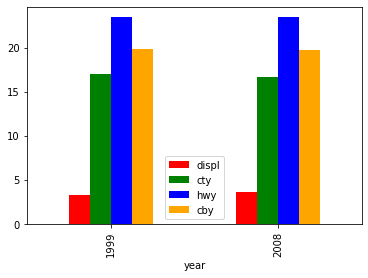

In [174]:
mpg.assign(cby = lambda x : 0.55 * x['cty'] + 0.45 * x['hwy']).groupby('year').mean()[["displ", "cty", "hwy", "cby"]].plot.bar(color = ['r','g','b','orange'])

# assign method를 이용하여 복합연비 새로운 변수 추가
# 연도별로 groupby를 진행 
# 모든 변수에 대해 평균을 구하고 배기량, 도시연비, 고속도로연비, 복합연비만 추출
# 각 변수에 대한 barcolor가 빨간색, 초록색, 파란색, 오렌지 색이고 xlabel이 연도인 barplot 그림

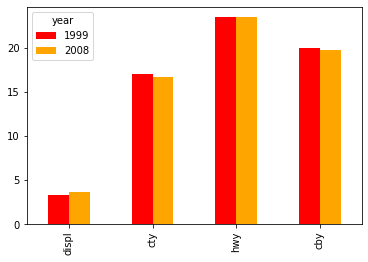

In [175]:
mpg.assign(cby = lambda x : 0.55 * x['cty'] + 0.45 * x['hwy']).groupby('year').mean()[["displ", "cty", "hwy", "cby"]].transpose().plot.bar(color = ['r', 'orange'])

# assign method를 이용하여 복합연비 새로운 변수 추가
# 연도별로 groupby를 진행 
# 모든 변수에 대해 평균을 구하고 배기량, 도시연비, 고속도로연비, 복합연비만 추출
# 이번에는 xlabel이 각 변수인 barplot 그리기 위해 transpose를 해준 후 각 연도에 대한 barcolor가 빨간색, 오렌지 색인 plot을 그림

15. 복합연비가 그 평균보다 크면 test에 good을, 작으면 bad를 할당해서 제조사별로 할당받은 good과 bad의 개수를 구하시오.


In [176]:
good = mpg.assign(cby = lambda x : 0.55 * x['cty'] + 0.45 * x['hwy']).assign(test = lambda x : np.where(x['cby'] > x['cby'].mean(), 'good', 'bad')).query('test == "good"').groupby('manufacturer').count()['test'].to_frame('good_count')
bad = mpg.assign(cby = lambda x : 0.55 * x['cty'] + 0.45 * x['hwy']).assign(test = lambda x : np.where(x['cby'] > x['cby'].mean(), 'good', 'bad')).query('test == "bad"').groupby('manufacturer').count()['test'].to_frame('bad_count')

pd.concat([good, bad], axis = 1)

# assign method 를 이용하여 복합연비라는 새로운 변수를 생성
# 복합연비가 그 평균보다 크면 good을 작으면 bad를 할당하는 test라는 새로운 변수를 생성
# 이 중 good인 행만 추출
# 제조사별로 groupby를 진행 후 제조사별 good을 받은 차량 대수를 구하기 위해 count이용
# good_count라는 열이름을 가진 데이터프레임으로 변환 후 good이라는 이름을 가진 변수에 저장
# bad 도 위단계와 마찬가지로 진행
# 이 두 변수에 저장된 데이터프레임을 열을 기준으로 합치기 위해 concat 사용

,good_count,bad_count
manufacturer,,
audi,14.0,4.0
chevrolet,7.0,12.0
dodge,4.0,33.0
ford,3.0,22.0
honda,9.0,NaN
hyundai,13.0,1.0
nissan,9.0,4.0
pontiac,5.0,NaN
subaru,14.0,NaN
